In [1]:
import sys
sys.path.append('/home/kevinteng/Desktop/BrainTumourSegmentation')
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from utils_vis import *
from model import *
from matplotlib import cm
import medpy.io
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
#model weights for corresponding model
ver = 'model_model_self_attention_06.h5'
#path where model weights is stored
model_weights = '/home/kevinteng/Desktop/model_weights/'+ver
#build model and load weights
input = Input([200,200,4])
model = Model(input, selfGuidedAtt_v02(input))
model.load_weights(model_weights)

(155, 240, 240, 5)



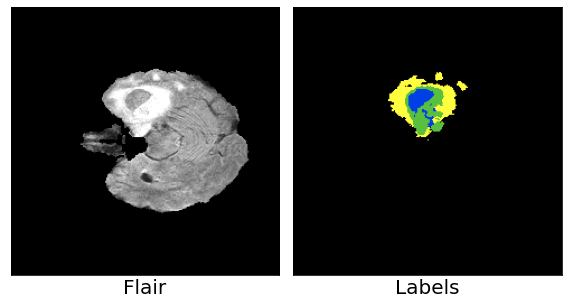

In [3]:
#path where training dataset is stored
train_ds_path = '/home/kevinteng/Desktop/ssd02/BraTS2020_preprocessed03/Training_pre/'
patients = sorted(os.listdir(train_ds_path))
sample = patients[0]
patient01 = np.load(train_ds_path+sample)
#pick middle slice of the patient
print(patient01.shape)
slice = 50
captions = ['Flair', 'Labels']
input_img = [patient01[slice,...,0], plot_labels_color(patient01[slice,...,-1])]
plot_comparison(input_img, captions, n_col=len(captions), figsize=(8,8))

In [4]:
model_inp = patient01[slice,20:220,20:220,:4]
model_inp = tf.expand_dims(model_inp, axis=0)
model.trainable = False
output_xent, output_dice, gated_attention, f_pc = model(model_inp)

Plot segmentation output for Xent for Deep Supervision

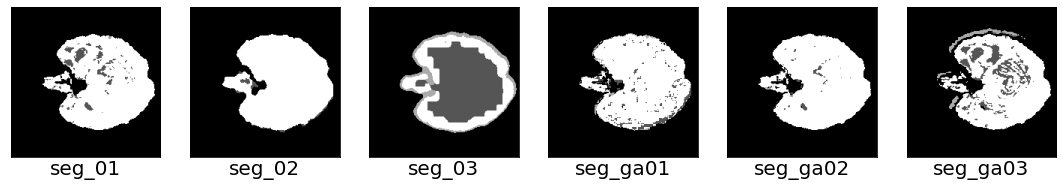

In [5]:
from tensorflow.keras.layers import Softmax
argmax_seg = [np.argmax(Softmax()(imgs), -1) for imgs in output_xent]
captions = ['seg_01', 'seg_02', 'seg_03', 'seg_ga01', 'seg_ga02', 'seg_ga03']
plot_comparison(argmax_seg, captions, n_col=len(captions), figsize=(15,15))

Plot Segmentation output for Dice Coefficient

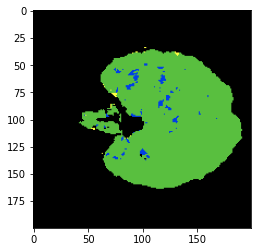

In [6]:
plt.imshow(plot_labels_color(tf.squeeze(np.argmax(output_dice,-1))))

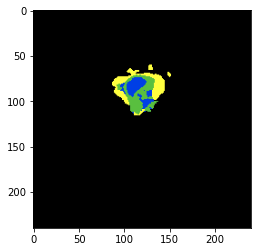

In [7]:
training_output_path = '/home/kevinteng/Desktop/ssd02/submission/Training_pre_model_self_attention_04_epoch20/'
training_output_patient = sorted(os.listdir(training_output_path))
patient_seg = training_output_patient[0]
seg, _ = medpy.io.load(training_output_path+patient_seg)
plt.imshow(plot_labels_color(seg[:,:,slice]))


 Gated Attention

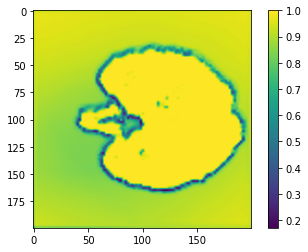

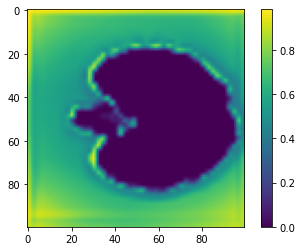

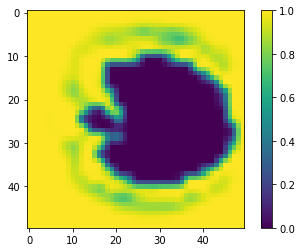

In [8]:
for imgs in gated_attention:
    plt.imshow(tf.squeeze(imgs))
    plt.colorbar()
    plt.show()

Plot PAM and CAM feature maps

In [9]:
f_pc[0][0].shape

TensorShape([1, 50, 50, 128])